In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
DATA_PATH = "data"
RESULTS_PATH = "results"
df_junit_5_11_4 = pd.read_csv(f"{DATA_PATH}/filtered_metrics_5-11-4.csv")
df_junit_5_12_0 = pd.read_csv(f"{DATA_PATH}/filtered_metrics_5-12-0.csv")
df_junit_5_12_1 = pd.read_csv(f"{DATA_PATH}/filtered_metrics_5-12-1.csv")

In [4]:
df_extended_junit_5_11_4 = df_junit_5_11_4.drop(columns=["File", "Essential"])
df_extended_junit_5_12_0 = df_junit_5_12_0.drop(columns=["File", "Essential"])
df_extended_junit_5_12_1 = df_junit_5_12_1.drop(columns=["File", "Essential"])

In [5]:
df_extended_junit_5_11_4 = df_extended_junit_5_11_4[
    df_extended_junit_5_11_4["Kind"].isin(["Public Class", "Private Class"])
]
df_extended_junit_5_12_0 = df_extended_junit_5_12_0[
    df_extended_junit_5_12_0["Kind"].isin(["Public Class", "Private Class"])
]
df_extended_junit_5_12_1 = df_extended_junit_5_12_1[
    df_extended_junit_5_12_1["Kind"].isin(["Public Class", "Private Class"])
]

In [6]:
df_extended_junit_5_11_4.isna().sum()
df_extended_junit_5_12_0.isna().sum()
df_extended_junit_5_12_1.isna().sum()

Kind                     0
Name                     0
SumCyclomatic            0
AvgEssential             0
MaxInheritanceTree       0
PercentLackOfCohesion    0
CountClassDerived        0
CountClassCoupled        0
CountDeclMethod          0
CountLineCode            0
dtype: int64

## Compute the number of classes for each type ('Private Class', 'Public Class'), and for each tag.  [1.5 points]

In [7]:
print(
    f"Number of classes for each type (r5.11.4):\n{df_extended_junit_5_11_4['Kind'].value_counts()}\n"
)
print(
    f"Number of classes for each type (r5.12.0):\n{df_extended_junit_5_12_0['Kind'].value_counts()}\n"
)
print(
    f"Number of classes for each type (r5.12.1):\n{df_extended_junit_5_12_1['Kind'].value_counts()}\n"
)

Number of classes for each type (r5.11.4):
Kind
Public Class     334
Private Class     16
Name: count, dtype: int64

Number of classes for each type (r5.12.0):
Kind
Public Class     353
Private Class     16
Name: count, dtype: int64

Number of classes for each type (r5.12.1):
Kind
Public Class     353
Private Class     16
Name: count, dtype: int64



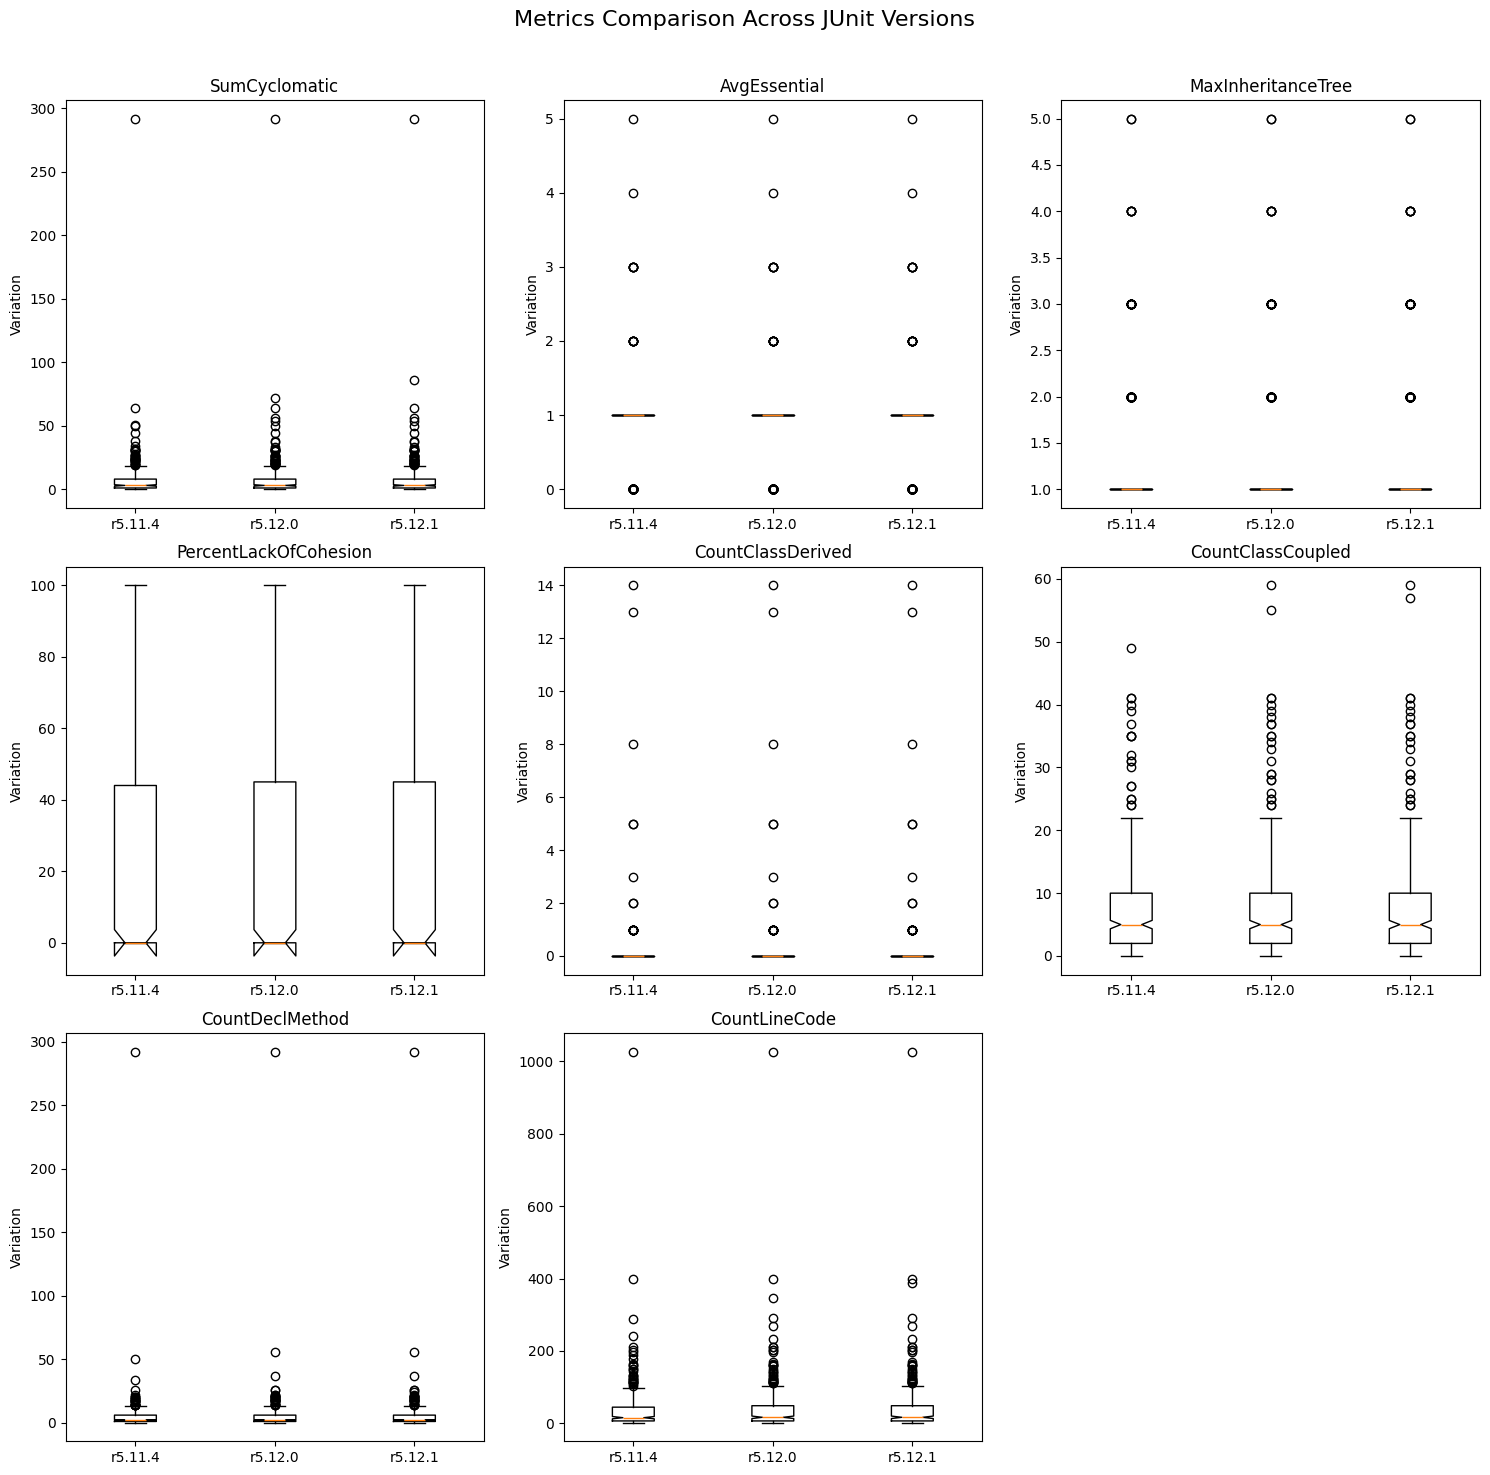

In [8]:
METRICS_TO_PLOT = [
    "SumCyclomatic",
    "AvgEssential",
    "MaxInheritanceTree",
    "PercentLackOfCohesion",
    "CountClassDerived",
    "CountClassCoupled",
    "CountDeclMethod",
    "CountLineCode",
]
x1 = df_extended_junit_5_11_4
x2 = df_extended_junit_5_12_0
x3 = df_extended_junit_5_12_1

# Calculate grid size (need a square grid)
grid_size = int(np.ceil(np.sqrt(len(METRICS_TO_PLOT))))

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.suptitle("Metrics Comparison Across JUnit Versions", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each metric
for i, metric_name in enumerate(METRICS_TO_PLOT):
    metric_data = [x1[metric_name], x2[metric_name], x3[metric_name]]

    axes[i].boxplot(
        metric_data, notch=True, tick_labels=["r5.11.4", "r5.12.0", "r5.12.1"]
    )
    axes[i].set_title(f"{metric_name}")
    axes[i].set_ylabel("Variation")

# Hide unused subplots
for j in range(len(METRICS_TO_PLOT), grid_size * grid_size):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## For each tag, report the median, where 50 percent of the scores fall, the smallest and the largest value. [2.5 points]

In [9]:
# Calculate statistics across metrics and versions
import os

versions = {
    "5.11.4": df_extended_junit_5_11_4,
    "5.12.0": df_extended_junit_5_12_0,
    "5.12.1": df_extended_junit_5_12_1,
}

# Create results directory if it doesn't exist
results_dir = "results"
os.makedirs(RESULTS_PATH, exist_ok=True)


# Function to analyze metrics
def analyze_metrics(metric_name):
    # For storing version summaries for comparison
    version_summaries = {}
    # For storing detailed analysis text
    analysis_text = []

    analysis_text.append(f"Analysis for {metric_name}\n{'='*50}")

    for version, df in enumerate(versions.items()):
        version, df = df  # Unpack the tuple
        metric = df[metric_name]

        # Calculate basic statistics
        q1 = np.quantile(metric, 0.25)
        q3 = np.quantile(metric, 0.75)
        med = np.median(metric)
        min_val = metric.min()
        max_val = metric.max()

        # Store summary statistics
        version_summaries[version] = {
            "Median": med,
            # "Q1": q1,
            # "Q3": q3,
            "Min": min_val,
            "Max": max_val,
        }

        analysis_text.append(f"\nAnalysis for {metric_name} in JUnit {version}:")
        analysis_text.append(
            f"Median: {med:.2f} (where 50% of the scores fall between {q1:.2f} and {q3:.2f})"
        )
        analysis_text.append(f"Smallest value: {min_val}, Largest value: {max_val}")

        # Also print to console
        print(f"\nAnalysis for {metric_name} in JUnit {version}:")
        print(
            f"Median: {med:.2f} (where 50% of the scores fall between {q1:.2f} and {q3:.2f})"
        )
        print(f"Smallest value: {min_val}, Largest value: {max_val}")

    # Print summary statistics comparison table
    print("\nSummary Statistics Comparison:")
    summary_df = pd.DataFrame(version_summaries).round(2)
    print(summary_df)

    # Add summary table to analysis text
    analysis_text.append("\nSummary Statistics Comparison:")
    analysis_text.append(summary_df.to_string())

    # Save the analysis text to a file
    with open(f"{RESULTS_PATH}/{metric_name}_analysis.txt", "w") as f:
        f.write("\n".join(analysis_text))

    # Save the summary dataframe to CSV
    summary_df.to_csv(f"{RESULTS_PATH}/{metric_name}_summary.csv")

    return summary_df


# Analyze each metric in METRICS_TO_PLOT
summary_tables = {}
for metric in METRICS_TO_PLOT:
    print(f"\n{'='*50}\nAnalyzing {metric}\n{'='*50}")
    summary_df = analyze_metrics(metric)
    summary_tables[metric] = summary_df

# Save all summary tables to a single Excel file with multiple sheets
with pd.ExcelWriter(f"{RESULTS_PATH}/all_metrics_summary.xlsx") as writer:
    for metric, df in summary_tables.items():
        df.to_excel(
            writer, sheet_name=metric[:31]
        )  # Excel limits sheet names to 31 chars

print(f"\nResults saved to {RESULTS_PATH}/ directory")


Analyzing SumCyclomatic

Analysis for SumCyclomatic in JUnit 5.11.4:
Median: 3.00 (where 50% of the scores fall between 1.00 and 8.00)
Smallest value: 0, Largest value: 292

Analysis for SumCyclomatic in JUnit 5.12.0:
Median: 3.00 (where 50% of the scores fall between 1.00 and 8.00)
Smallest value: 0, Largest value: 292

Analysis for SumCyclomatic in JUnit 5.12.1:
Median: 3.00 (where 50% of the scores fall between 1.00 and 8.00)
Smallest value: 0, Largest value: 292

Summary Statistics Comparison:
        5.11.4  5.12.0  5.12.1
Median     3.0     3.0     3.0
Min        0.0     0.0     0.0
Max      292.0   292.0   292.0

Analyzing AvgEssential

Analysis for AvgEssential in JUnit 5.11.4:
Median: 1.00 (where 50% of the scores fall between 1.00 and 1.00)
Smallest value: 0.0, Largest value: 5.0

Analysis for AvgEssential in JUnit 5.12.0:
Median: 1.00 (where 50% of the scores fall between 1.00 and 1.00)
Smallest value: 0.0, Largest value: 5.0

Analysis for AvgEssential in JUnit 5.12.1:
Medi

## Is the quality characteristic of the code increasing, decreasing or remaining the same across tags? [0.5 point]


## Question 2.3
For size and complexity metrics (McCabe CC, EC and SLOC) generate box plots at the method level: i.e., Kind value in 'Private Method', 'Public Method', 'Protected Method'. [2points] 

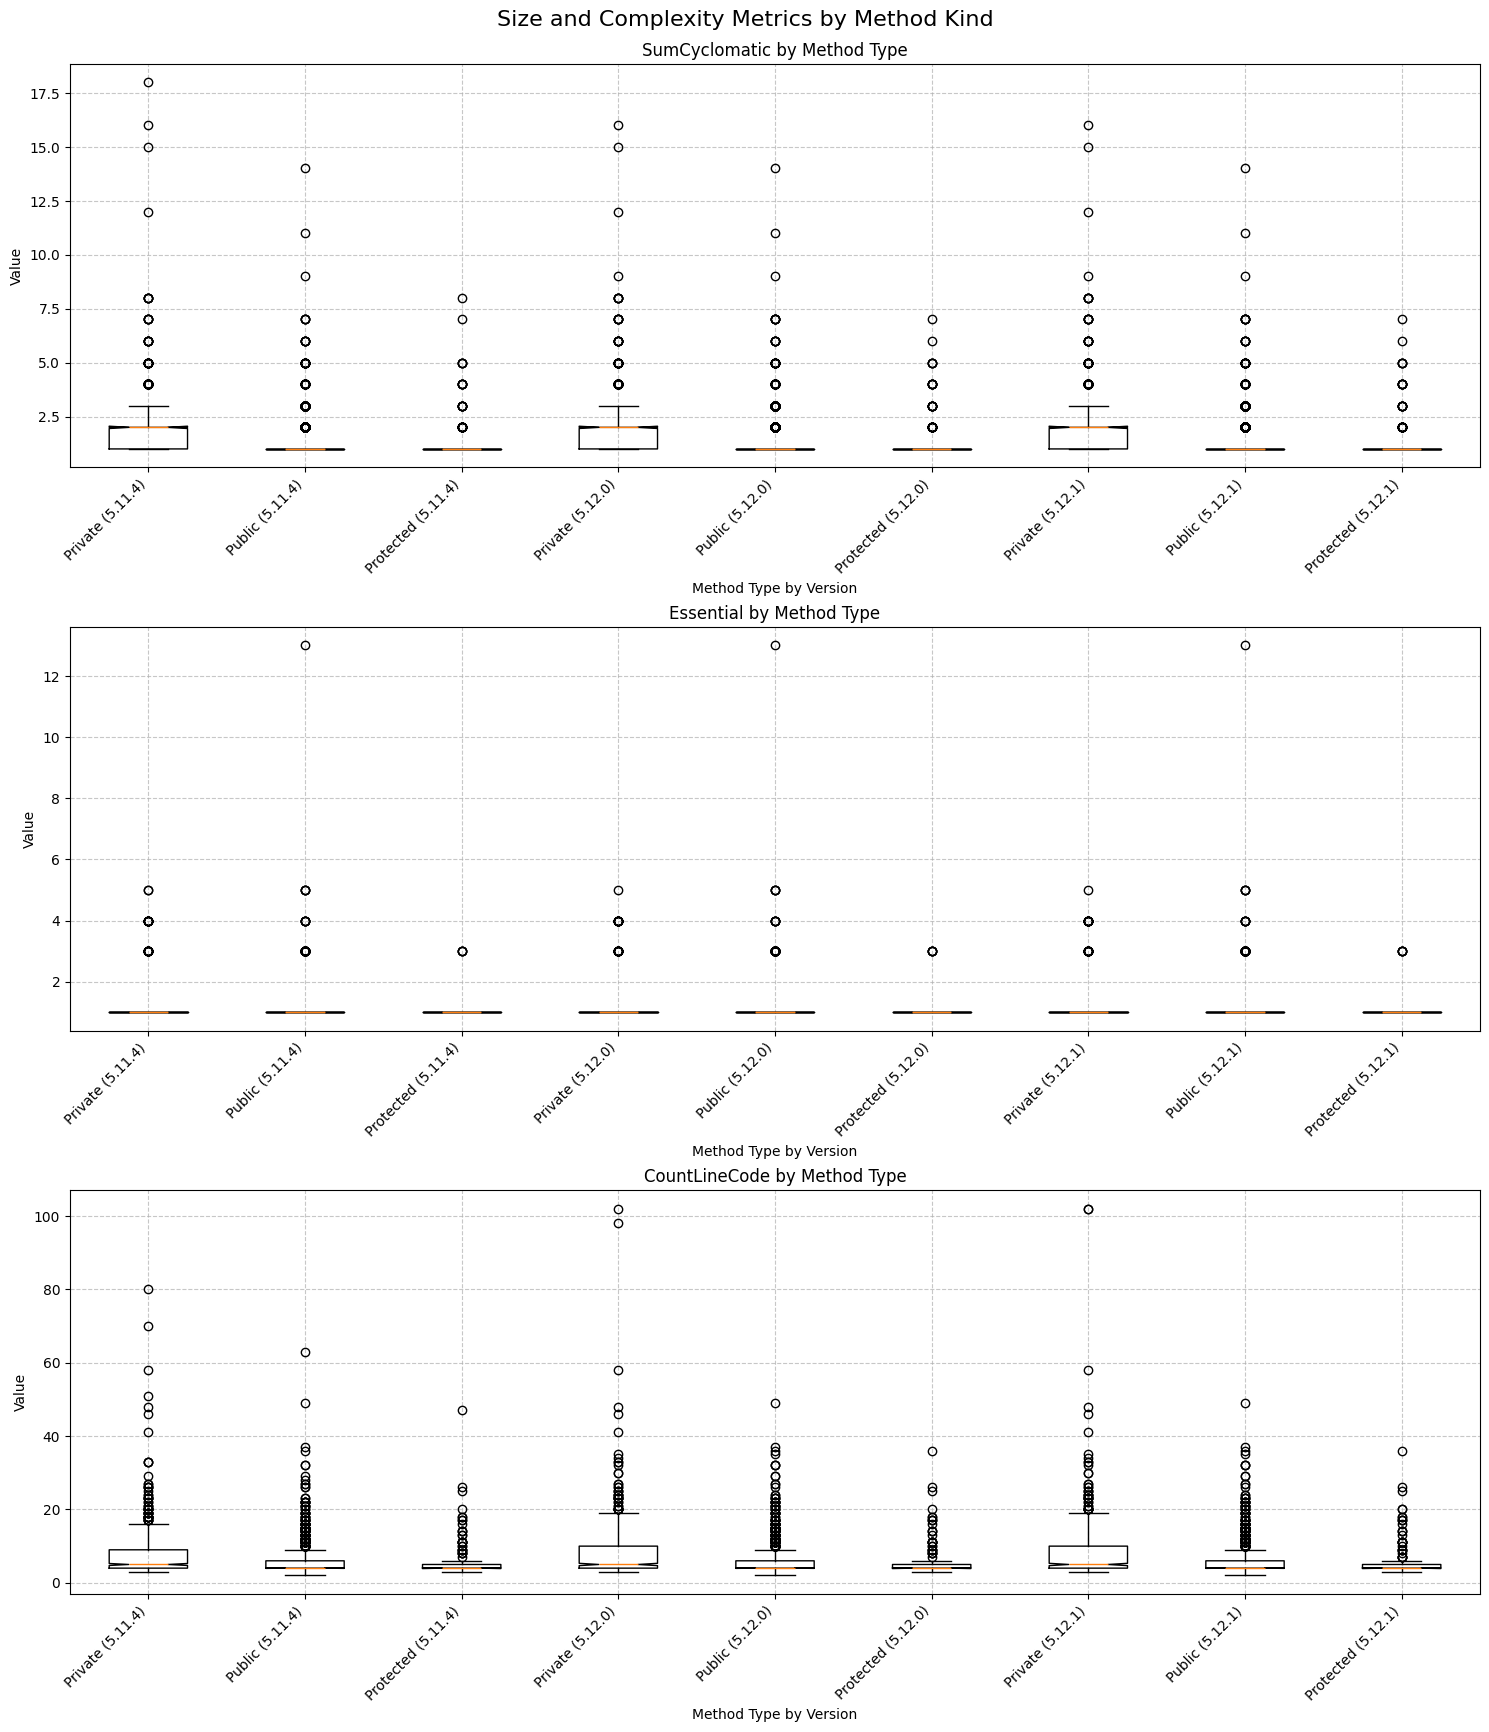

In [10]:
df_extended_junit_5_11_4 = df_junit_5_11_4.drop(columns=["File"])
df_extended_junit_5_12_0 = df_junit_5_12_0.drop(columns=["File"])
df_extended_junit_5_12_1 = df_junit_5_12_1.drop(columns=["File"])

# Size and complexity metrics at method level by method kind
complexity_metrics = ["SumCyclomatic", "Essential", "CountLineCode"]
method_types = ["Private Method", "Public Method", "Protected Method"]

# Create a figure with subplots arranged as 3 metrics x 3 versions
fig, axes = plt.subplots(len(complexity_metrics), 1, figsize=(15, 18))
fig.suptitle("Size and Complexity Metrics by Method Kind", fontsize=16)

versions = {
    "5.11.4": df_extended_junit_5_11_4,
    "5.12.0": df_extended_junit_5_12_0,
    "5.12.1": df_extended_junit_5_12_1,
}

for i, metric in enumerate(complexity_metrics):
    method_data = []
    labels = []

    for version_name, df in versions.items():
        for method_type in method_types:
            # Filter data by method type
            method_data.append(df[df["Kind"] == method_type][metric].dropna())
            labels.append(f"{method_type.split(' ')[0]} ({version_name})")

    # Create boxplot for this metric
    axes[i].boxplot(method_data, tick_labels=labels, notch=True)
    axes[i].set_title(f"{metric} by Method Type")
    axes[i].set_ylabel("Value")
    axes[i].set_xlabel("Method Type by Version")
    # Rotate x-axis labels for better readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

    # Add grid for better readability
    axes[i].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)
plt.show()

# Answer the Following Questions

## A. Compute the number of methods for each type ('Private Method', 'Public Method', 'Protected Method'), and for each tag. [1.5 point]

In [11]:
df_extended_junit_5_11_4 = df_junit_5_11_4.drop(columns=["File"])
df_extended_junit_5_12_0 = df_junit_5_12_0.drop(columns=["File"])
df_extended_junit_5_12_1 = df_junit_5_12_1.drop(columns=["File"])

# Define method types to analyze
method_types = ["Private Method", "Public Method", "Protected Method"]

print("Number of methods by access type (JUnit 5.11.4):")
print(
    df_extended_junit_5_11_4[df_extended_junit_5_11_4["Kind"].isin(method_types)][
        "Kind"
    ].value_counts()
)
print("\nNumber of methods by access type (JUnit 5.12.0):")
print(
    df_extended_junit_5_12_0[df_extended_junit_5_12_0["Kind"].isin(method_types)][
        "Kind"
    ].value_counts()
)
print("\nNumber of methods by access type (JUnit 5.12.1):")
print(
    df_extended_junit_5_12_1[df_extended_junit_5_12_1["Kind"].isin(method_types)][
        "Kind"
    ].value_counts()
)

Number of methods by access type (JUnit 5.11.4):
Kind
Public Method       2035
Private Method       837
Protected Method     171
Name: count, dtype: int64

Number of methods by access type (JUnit 5.12.0):
Kind
Public Method       2218
Private Method       887
Protected Method     175
Name: count, dtype: int64

Number of methods by access type (JUnit 5.12.1):
Kind
Public Method       2226
Private Method       889
Protected Method     181
Name: count, dtype: int64


## B. List the top 5 methods with the highest SLOC, and complexity values for each tag.  [2.5 points]

In [12]:
def get_top_methods(df, metric_name, n=5):
    # Filter for method entries
    methods_df = df[df["Kind"].str.contains("Method")]
    # Sort by the given metric in descending order
    top_methods = methods_df.sort_values(by=metric_name, ascending=False).head(n)
    return top_methods[["Name", metric_name]].reset_index(drop=True)


# Open a file to save the output
with open(f"{RESULTS_PATH}/top_methods_analysis.txt", "w") as f:
    # Top 5 methods by SLOC (CountLineCode)
    f.write("Top 5 methods by SLOC (CountLineCode)\n")

    f.write("\nJUnit 5.11.4:\n")
    f.write(get_top_methods(df_junit_5_11_4, "CountLineCode").to_string())

    f.write("\n\nJUnit 5.12.0:\n")
    f.write(get_top_methods(df_junit_5_12_0, "CountLineCode").to_string())

    f.write("\n\nJUnit 5.12.1:\n")
    f.write(get_top_methods(df_junit_5_12_1, "CountLineCode").to_string())

    # Top 5 methods by EC (Essential)
    f.write("\n\n\nTop 5 methods by EC (Essential)\n")

    f.write("\nJUnit 5.11.4:\n")
    f.write(get_top_methods(df_junit_5_11_4, "Essential").to_string())

    f.write("\n\nJUnit 5.12.0:\n")
    f.write(get_top_methods(df_junit_5_12_0, "Essential").to_string())

    f.write("\n\nJUnit 5.12.1:\n")
    f.write(get_top_methods(df_junit_5_12_1, "Essential").to_string())

print("Top 5 methods by SLOC (CountLineCode)")
print("\nJUnit 5.11.4:")
print(get_top_methods(df_junit_5_11_4, "CountLineCode"))
print("\nJUnit 5.12.0:")
print(get_top_methods(df_junit_5_12_0, "CountLineCode"))
print("\nJUnit 5.12.1:")
print(get_top_methods(df_junit_5_12_1, "CountLineCode"))

print("\n\nTop 5 methods by EC (Essential)")
print("\nJUnit 5.11.4:")
print(get_top_methods(df_junit_5_11_4, "Essential"))
print("\nJUnit 5.12.0:")
print(get_top_methods(df_junit_5_12_0, "Essential"))
print("\nJUnit 5.12.1:")
print(get_top_methods(df_junit_5_12_1, "Essential"))

print(f"\nResults saved to '{RESULTS_PATH}/top_methods_analysis.txt'")

Top 5 methods by SLOC (CountLineCode)

JUnit 5.11.4:
                                                Name  CountLineCode
0  org.junit.jupiter.engine.TestInstanceLifecycle...          109.0
1  org.junit.jupiter.engine.TestInstanceLifecycle...          105.0
2  org.junit.jupiter.engine.TestInstanceLifecycle...          105.0
3  org.junit.jupiter.params.ParameterizedTestExte...           80.0
4  org.junit.jupiter.engine.extension.AutoCloseTe...           73.0

JUnit 5.12.0:
                                                Name  CountLineCode
0  org.junit.jupiter.engine.TestInstanceLifecycle...          109.0
1  org.junit.jupiter.engine.TestInstanceLifecycle...          105.0
2  org.junit.jupiter.engine.TestInstanceLifecycle...          105.0
3  org.junit.jupiter.engine.extension.TempDirecto...          102.0
4  org.junit.jupiter.params.ParameterizedTestExte...           98.0

JUnit 5.12.1:
                                                Name  CountLineCode
0  org.junit.jupiter.engine.TestI

## C. Do the methods listed in (B) change in consecutive tags, or are they replaced in the top 5 by methods with worse values? Provide details for each method [2.5 points]